**Prediction of Wine Quality based on its Manufacturing Ingredients**

## 1. Data Importing and Initial Exploration

In [1]:
# from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from pprint import pprint
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
df =  pd.read_csv('https://raw.githubusercontent.com/rjrahul24/AppliedML-Project/main/winequalityN.csv',sep = ",")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**1. a) Analysis of Missing Values**

In the sections below, we wil be exploring missing values in the dataset. We have replaced the missing values in this case with the mean from its own class i.e. either red or white wine. This makes sure more appropriate values are appended rather than the generic mean.


In [4]:
total_entries = (df.shape[0] * df.shape[1])
missing_entries_max = df.isnull().sum().sum()
missing_entries_max_percentage = (missing_entries_max / total_entries) * 100

print(f"Total entries in the dataset: %i" % total_entries)
print(f"Maximum missing values in the dataset: {missing_entries_max}")
print(f"Percentage of maximum missing values in the dataset: {missing_entries_max_percentage:.2f}%")

Total entries in the dataset: 84461
Maximum missing values in the dataset: 38
Percentage of maximum missing values in the dataset: 0.04%


In [5]:
missingness = df.groupby('type').apply(lambda x: x.isna().mean()*100)
missingness

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,,
red,0.0,0.125078,0.062539,0.062539,0.000000,0.000000,0.0,0.0,0.0,0.125078,0.125078,0.0,0.0
white,0.0,0.163332,0.142915,0.040833,0.040833,0.040833,0.0,0.0,0.0,0.142915,0.040833,0.0,0.0


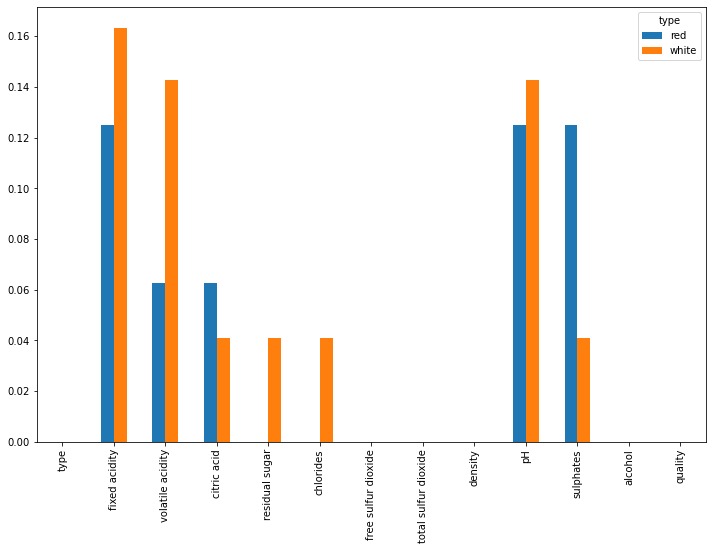

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
missingness.T.plot(kind='bar',ax=ax)
plt.show()

We've observed missing data for both types, we'd like to drop the rows with missing values.

In [7]:
df = df.dropna(axis=0)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
df.isna().mean()

type                    0.0
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

There's no missing value after processing.

In [9]:
# Transforming the 'Type' Variable to read with 0 and 1 
df = df.replace('red', 0)
df = df.replace('white', 1)

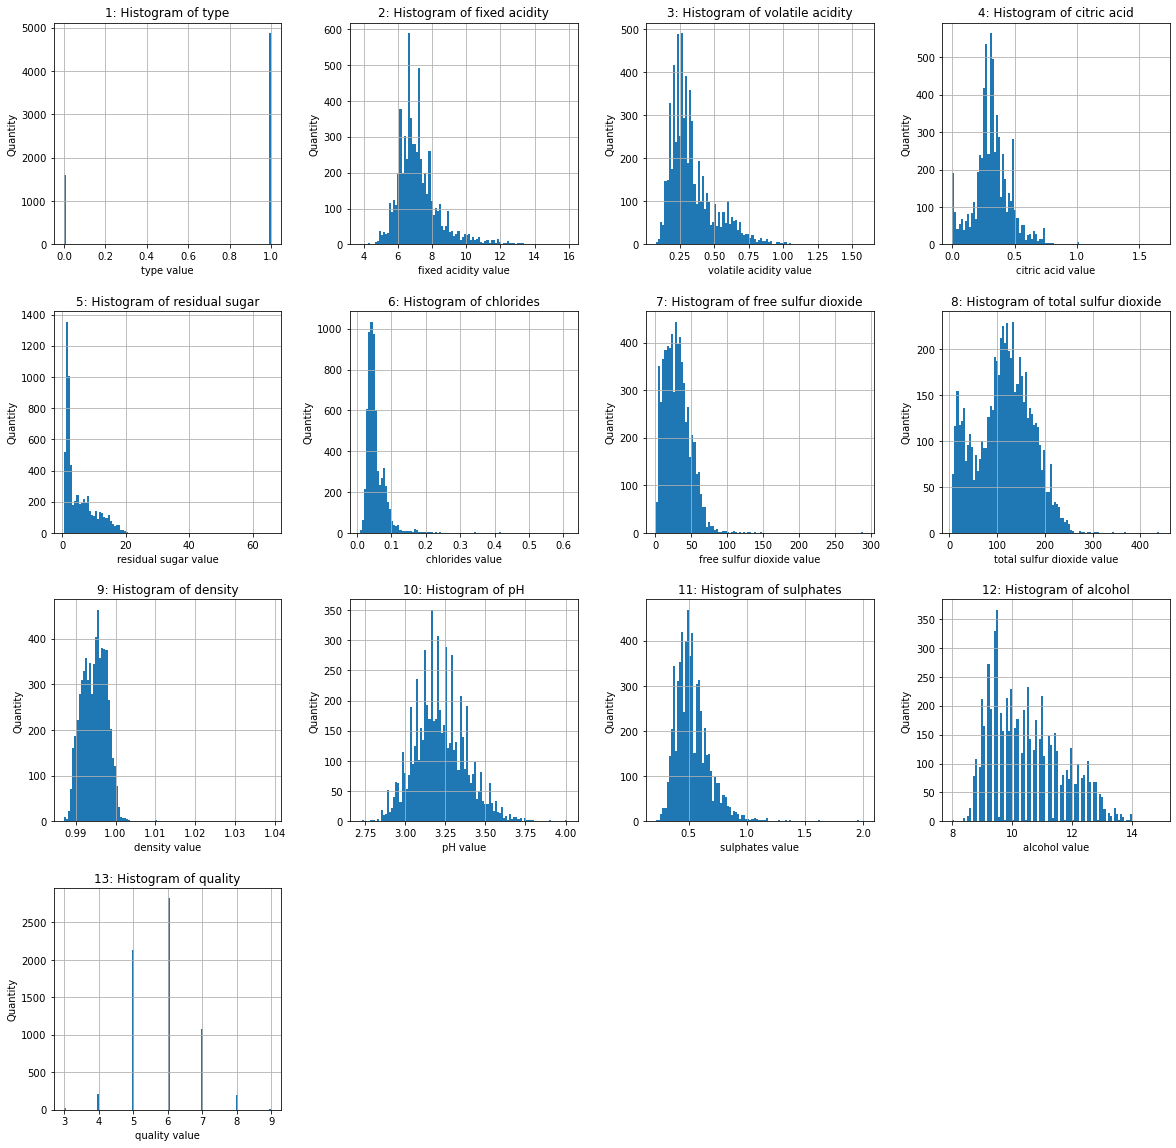

In [10]:
fig_ax = df.hist(bins = 100, figsize = (20, 20))
i=1
for ax in fig_ax.flatten():
    ax.set_xlabel(f"{ax.get_title()} value")
    ax.set_ylabel("Quantity")
    title = ax.get_title() 
    ax.set_title(f"%d: Histogram of {title}" % (i)) 
    i=i+1
plt.show()

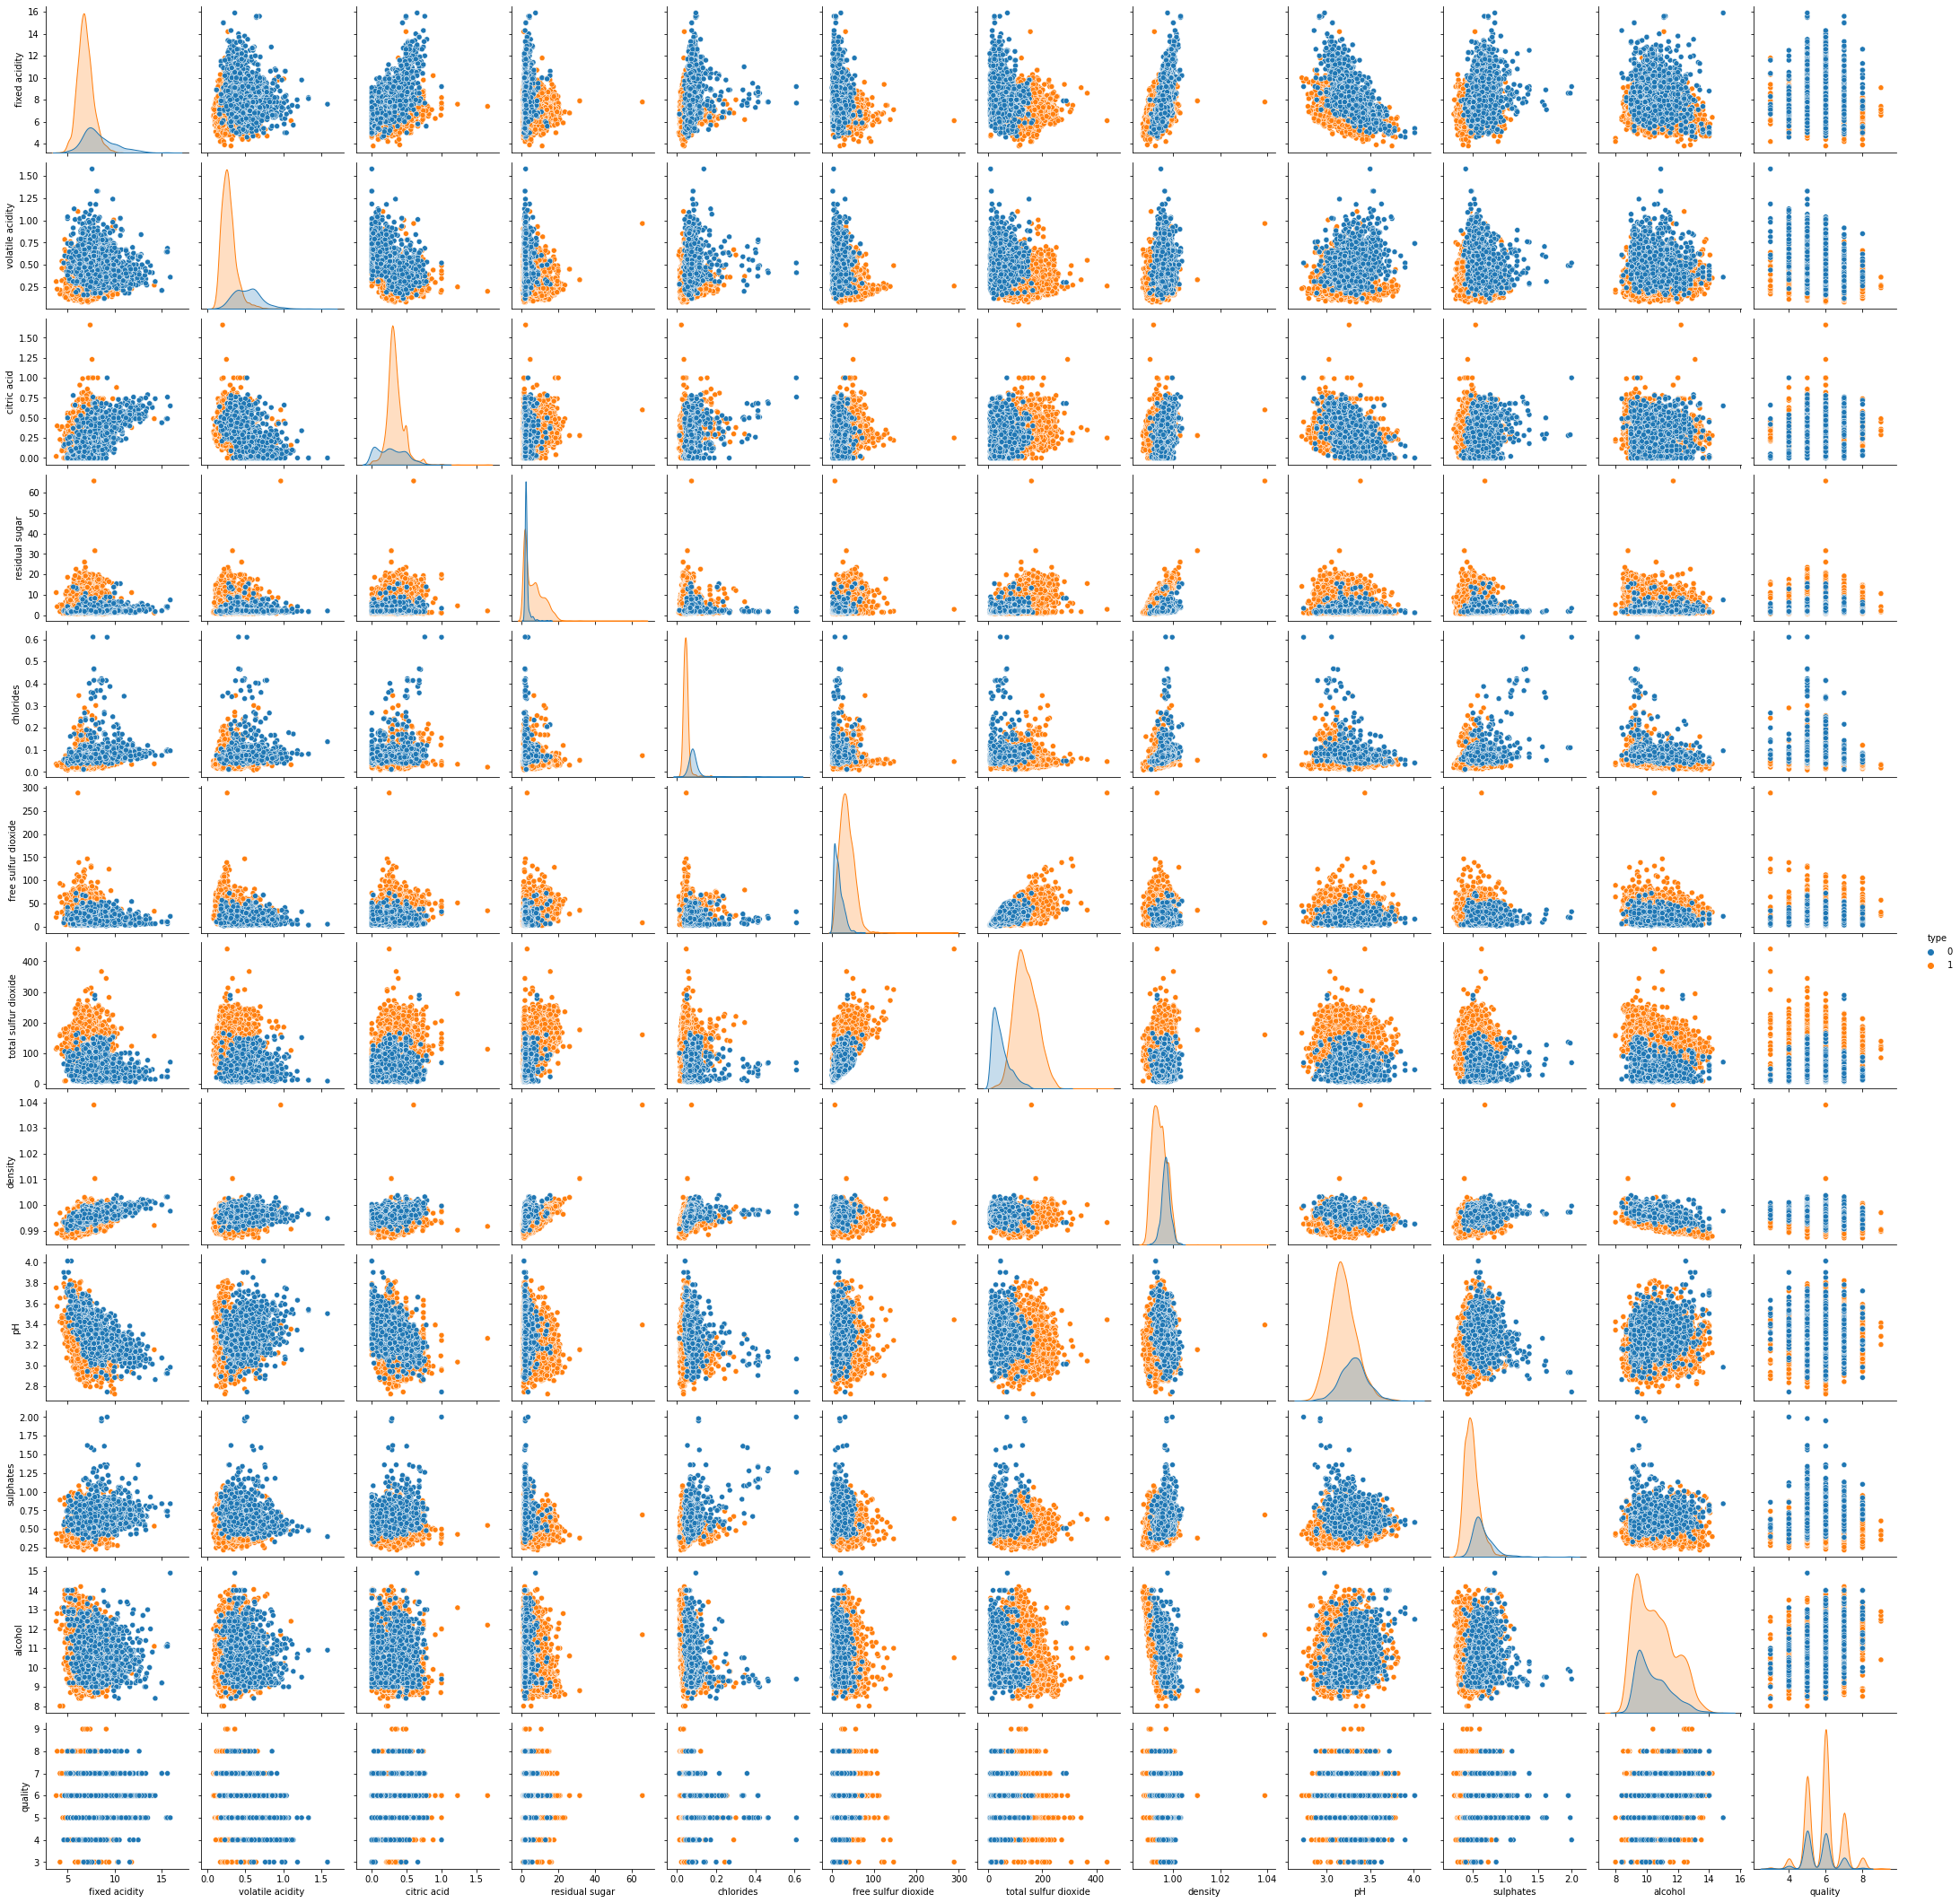

In [11]:
sns.pairplot(df,hue='type')

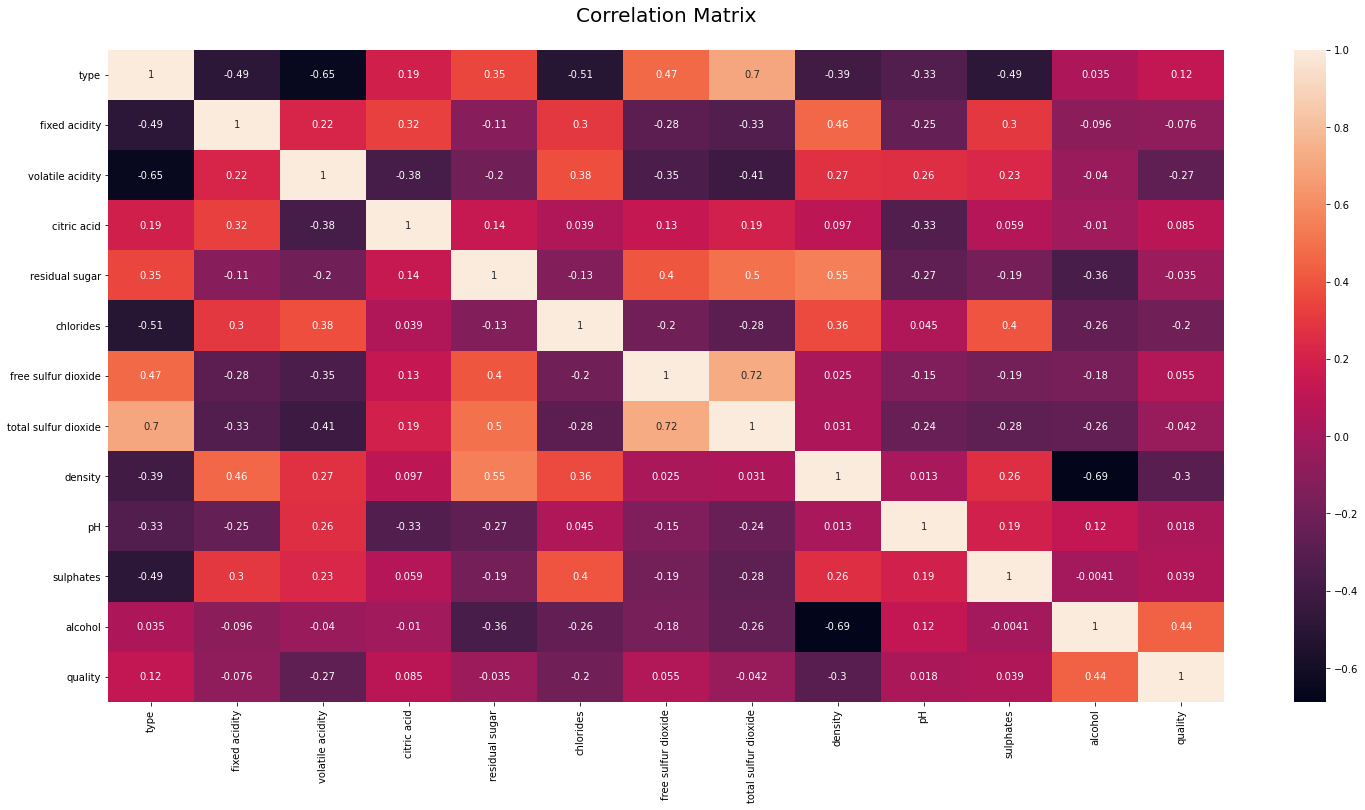

In [12]:
plt.figure(figsize = (25, 12))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix\n', fontsize = 20)
plt.show()

**Study of Correlations between Feature and Target Variable**

From the pair plots and the calculation of correlation, we see the following relations between the feature and target variables.

1.   The feature variables affecting the outcome of wine quality the most are volatile acidity, chlorides, density and alcohol.
2.   Alcohol shows a strong positive correlation while the other variables represent strong negative correlations.
3. Fixed Acidity, Residual Sugar, and Total Sulfur Dioxide have weak negative correlation with wine quality. 
4. Citric Acid, Free Sulfur Dioxide, pH and Sulphates have significantly weak positive correlation with the quality of wine. 

In [14]:
df.mean()

type                      0.753520
fixed acidity             7.217755
volatile acidity          0.339589
citric acid               0.318758
residual sugar            5.443958
chlorides                 0.056056
free sulfur dioxide      30.516865
total sulfur dioxide    115.694492
density                   0.994698
pH                        3.218332
sulphates                 0.531150
alcohol                  10.492825
quality                   5.818505
good                      0.196658
dtype: float64

In [15]:
stratified = df.groupby('quality', group_keys=False).apply(lambda x: x.sample(2))
stratified.mean()

type                      0.714286
fixed acidity             7.571429
volatile acidity          0.376786
citric acid               0.289286
residual sugar            4.492857
chlorides                 0.049071
free sulfur dioxide      28.285714
total sulfur dioxide    106.500000
density                   0.994483
pH                        3.280000
sulphates                 0.545000
alcohol                  10.853571
quality                   6.000000
good                      0.428571
dtype: float64

In [16]:
random = df.sample(frac=0.45, replace=True, random_state=1)
random.mean()

type                      0.756190
fixed acidity             7.181568
volatile acidity          0.340232
citric acid               0.317493
residual sugar            5.636176
chlorides                 0.054736
free sulfur dioxide      30.340440
total sulfur dioxide    116.548143
density                   0.994777
pH                        3.219298
sulphates                 0.527809
alcohol                  10.475935
quality                   5.831155
good                      0.197730
dtype: float64

## 2. Data Preparation

In [18]:
# Add binary classification column
df['good'] = [1 if x >=7 else 0 for x in df['quality']]

## 3. Sava output to file

In [19]:
df.to_csv('../data/wine_quality_pre.csv')